<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_Junho_2020/blob/master/ANN_segmentacao_tensor_OUR_v14_junho_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd

In [2]:
!pip install mahotas

     |████████████████████████████████| 1.5MB 2.5MB/s 
  Created wheel for mahotas: filename=mahotas-1.4.9-cp36-cp36m-linux_x86_64.whl size=4265663 sha256=69cec71e73ffc67f0a77ab70e1c286461850b6843503526d55f5e60b28deaff5
  Stored in directory: /root/.cache/pip/wheels/02/e7/50/b67eee3b19c479cc5b41f10230bf9c1556be6eaaf095c6e997
Successfully built mahotas


In [0]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020

import Go2BlackWhite
import Go2Mahotas

Cloning into 'marquesgabi_fev_2020'...
remote: Enumerating objects: 73, done.
remote: Counting objects: 100% (73/73), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 73 (delta 37), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (73/73), done.
/content/marquesgabi_fev_2020


In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [6]:
''''''
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado
Transfere='Fotos9Amostras720_e_varios_graos.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()


Cloning into 'Doutorado'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 256 (delta 1), reused 0 (delta 0), pack-reused 250
Receiving objects: 100% (256/256), 71.51 MiB | 12.09 MiB/s, done.
Resolving deltas: 100% (124/124), done.
/content/marquesgabi_fev_2020/Doutorado


In [0]:
#Construção da rede com as fotos já recortadas anteriormente
labels = [] #882 imagens recortadas por nós
images = [] #882 imagens lidas no formato de lista 
with zipfile.ZipFile(Transfere, "r") as f:
  for f in f.namelist():
    images.append(cv2.imread(f))
    labels.append(f)


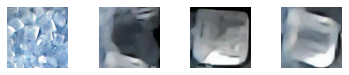

In [8]:
# Import the 'pyplot' module of 'matplotlib'
import matplotlib.pyplot as plt

# Determine the (random) indexes of the images that you want to see 
traffic_signs = [25, 30, 36, 40]

# Fill out the subplots with the random images that you defined 
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)

plt.show()

In [0]:
# Import the 'transform' module from 'skimage'
from skimage import transform 

# Rescale the images in the 'images' array
images28 = [transform.resize(image, (28, 28)) for image in images]

In [0]:
# Import 'rgb2gray' from 'skimage.color'
from skimage.color import rgb2gray

# Convert 'images28' to an array
images28 = np.array(images28)

# Convert 'images28' to grayscale
images28 = rgb2gray(images28)

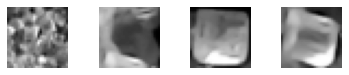

In [11]:
for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.imshow(images28[traffic_signs[i]], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
    
# Show the plot
plt.show()

In [12]:
y_valor=[]

img_name=labels

Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

for x in img_name:
  if re.search(Graos, x):
    y_valor.append(1)
  elif re.search(Indef, x):
    y_valor.append(2)
  elif re.search(Buraco, x):
    y_valor.append(3)
  else:
    y_valor.append(4)
    
print(y_valor)
print(len(y_valor))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 3, 

In [0]:
#sparse_softmax_cross_entropy_with_logits()

In [0]:
#Define data train and data test
W_train, W_test, yw_train, yw_test = train_test_split(np.array(images28), np.array(y_valor), 
                                                    test_size=0.30, 
                                                    random_state=42)

In [0]:
#print(len(yw_train))
#print(len(yw_test))

In [0]:
train_images=W_train #imagens utilizadas para o treino
train_labels=yw_train # resposta da rede
test_images=W_test
test_labels=yw_test

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [19]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: 1.4878 - accuracy: 0.4052
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: 1.0680 - accuracy: 0.5608
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: 0.9631 - accuracy: 0.5721
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8637 - accuracy: 0.6759
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.8123 - accuracy: 0.6629
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7429 - accuracy: 0.7099
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7047 - accuracy: 0.7147
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: 0.7006 - accuracy: 0.7018
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6673 - accuracy: 0.7229
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6389 - accuracy: 0.7358


In [20]:
'''
predictions = model.predict(train_images) #x_test[:3])
print('predictions shape:', predictions.shape)
'''

"\npredictions = model.predict(train_images) #x_test[:3])\nprint('predictions shape:', predictions.shape)\n"

In [0]:
#print(predictions)
#print(train_images.shape)

In [22]:
'''
result = model.evaluate(train_images) # esta estranho
print(result)
result = model.predict(train_images) # esta estranho
print(result)
'''

'\nresult = model.evaluate(train_images) # esta estranho\nprint(result)\nresult = model.predict(train_images) # esta estranho\nprint(result)\n'

In [23]:
#ANN das imagens recortadas por nós
x=images28 
logits = model(x, training=False)
prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction)

tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 4 4 4 4 3 3 3 3 3 3 3 3 3 1
 1 1 1 1 1 1 1 1 1 4 4 2 2 1 1 1 1 4 1 1 4 1 1 1 1 3 3 3 3 3 3 3 3 3 3 1 1
 1 1 1 1 1 1 1 1 1 4 4 4 1 4 1 2 3 2 4 1 1 4 2 2 3 3 3 3 3 3 3 3 3 3 1 1 1
 1 1 1 1 4 1 1 3 2 4 1 1 1 4 1 2 2 1 4 4 1 1 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1
 1 1 1 1 1 1 2 4 2 4 4 4 1 4 1 2 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 4 1 4 4 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 2 4 1 2 1
 4 4 2 1 2 2 1 4 4 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 4 1 1 4 2 3
 4 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 3 3
 3 4 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 1 1 4 4 1 2 1 4 4 4 1 1 1 1 1 1 3 3 3
 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 2 1 2 4 1 4 4 1 1 4 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 4 4 4 1 4 4 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1
 1 1 1 1 3 2 1 1 1 4 4 2 3 3 2 4 4 1 4 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 4 4 4 1 1 3 3 3 3 3 3 3 3 3 3 1 1 1 1 1 1 1 1 1 1 4 1 1 4 4 1 4
 1 1 4 4 1 1 4

In [24]:
data = {'y_Actual': y_valor,
        'y_Predicted': prediction
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
print (df)

     y_Actual  y_Predicted
0           1            1
1           1            1
2           1            1
3           1            1
4           1            1
..        ...          ...
877         4            1
878         4            1
879         4            4
880         4            1
881         4            1

[882 rows x 2 columns]


In [25]:
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)

Predicted    1   2    3   4
Actual                     
1          351   0    3   6
2           71  27   20  62
3            2   0  175   3
4           90   6    2  64


In [26]:
import sklearn
y_true = df['y_Actual']
y_pred = df['y_Predicted']

print(sklearn.metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.68      0.97      0.80       360
           2       0.82      0.15      0.25       180
           3       0.88      0.97      0.92       180
           4       0.47      0.40      0.43       162

    accuracy                           0.70       882
   macro avg       0.71      0.62      0.60       882
weighted avg       0.71      0.70      0.65       882



In [0]:
# Segmentation: start here......

In [0]:
#Start to use the big image
Size=1200 # tamanho da foto
Sub_Size=int(Size/5) # tamanho do fracionamento
Row_Crop=1/2 # posicao do corte
Crop=int(Size*Row_Crop)

In [0]:
Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

In [0]:
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0]

In [31]:
print(img.shape)

(1200, 1200)


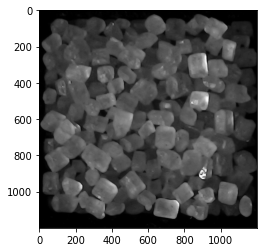

In [32]:
plt.imshow(img, cmap = "gray")

In [0]:
a=0
b=1200
c=100
d=200
Num=50
ww=[]
label=[]

for i in range(Num):
  #x=random.randint(a, b)
  #y=random.randint(a, b)
  #Width=random.randint(c, d)
  x=randint(a, b)
  y=randint(a, b)
  Width=randint(c, d)
  img_1st=np.zeros((Width,Width)).astype(np.int64)

  for i in range(Width):
    for j in range(Width):

      size_x=Width+x
      size_y=Width+y
    
      if(size_x>=Size):
        x=Size-Width

      if(size_y>= Size):
        y=Size-Width

      img_1st[i,j]=np.copy(img[i+y,j+x])
  ww.append(img_1st)
  nome = "W=" + str(Width)+" x="+str(x)+" y="+str(y)
  label.append(nome)


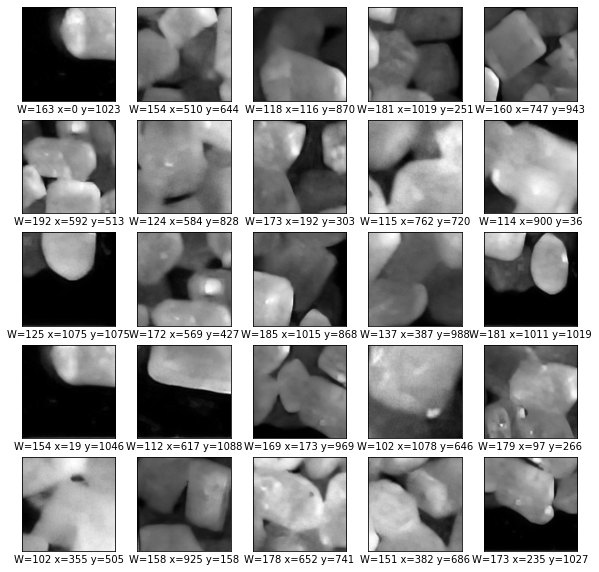

In [34]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i], cmap = "gray")
    plt.xlabel(label[i])
plt.show()


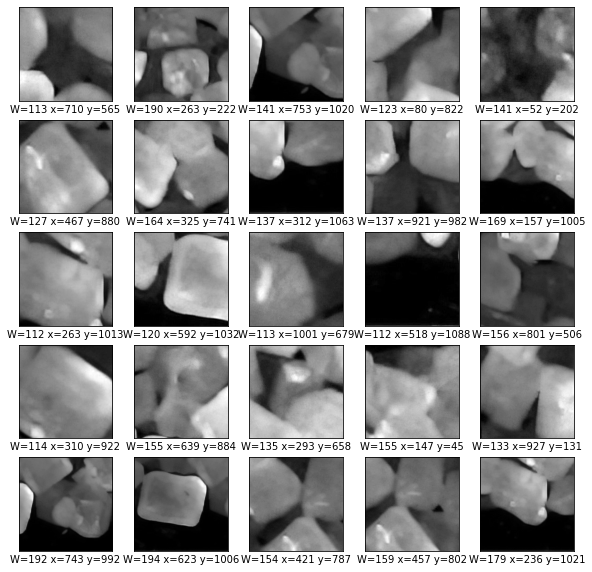

In [35]:
Num=25
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(ww[i+25], cmap = "gray")
    plt.xlabel(label[i+25])
plt.show()

In [36]:
print(label)

['W=163 x=0 y=1023', 'W=154 x=510 y=644', 'W=118 x=116 y=870', 'W=181 x=1019 y=251', 'W=160 x=747 y=943', 'W=192 x=592 y=513', 'W=124 x=584 y=828', 'W=173 x=192 y=303', 'W=115 x=762 y=720', 'W=114 x=900 y=36', 'W=125 x=1075 y=1075', 'W=172 x=569 y=427', 'W=185 x=1015 y=868', 'W=137 x=387 y=988', 'W=181 x=1011 y=1019', 'W=154 x=19 y=1046', 'W=112 x=617 y=1088', 'W=169 x=173 y=969', 'W=102 x=1078 y=646', 'W=179 x=97 y=266', 'W=102 x=355 y=505', 'W=158 x=925 y=158', 'W=178 x=652 y=741', 'W=151 x=382 y=686', 'W=173 x=235 y=1027', 'W=113 x=710 y=565', 'W=190 x=263 y=222', 'W=141 x=753 y=1020', 'W=123 x=80 y=822', 'W=141 x=52 y=202', 'W=127 x=467 y=880', 'W=164 x=325 y=741', 'W=137 x=312 y=1063', 'W=137 x=921 y=982', 'W=169 x=157 y=1005', 'W=112 x=263 y=1013', 'W=120 x=592 y=1032', 'W=113 x=1001 y=679', 'W=112 x=518 y=1088', 'W=156 x=801 y=506', 'W=114 x=310 y=922', 'W=155 x=639 y=884', 'W=135 x=293 y=658', 'W=155 x=147 y=45', 'W=133 x=927 y=131', 'W=192 x=743 y=992', 'W=194 x=623 y=1006', '

In [0]:
#img = ww[0].reshape((28,28))
#ww[0].shape
#ww[0].size

In [38]:
print(np.array(ww[0]))

[[ 0  0  0 ... 79 79 80]
 [ 0  0  0 ... 80 79 79]
 [ 0  0  0 ... 78 79 79]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]


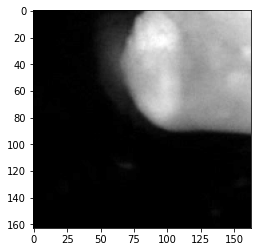

In [39]:
plt.imshow(ww[0], cmap = "gray")

In [40]:
Num=50
Size=28
img28_all=[]
for i in range(Num):
  data=np.array(ww[i])
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)
  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  img28_all.append(img28)

img28_all=np.array(img28_all)
print(img28_all.shape)


(50, 28, 28)


In [41]:
#ANN da imagem grande
x=img28_all
logits = model(x, training=False)
prediction_all = tf.argmax(logits, axis=1, output_type=tf.int32)
print(prediction_all)

tf.Tensor(
[1 3 4 3 4 1 2 3 3 1 4 3 4 3 1 3 1 4 4 1 2 1 4 1 4 3 4 4 3 3 1 1 4 3 1 1 1
 4 3 3 1 2 3 1 1 4 1 4 4 4], shape=(50,), dtype=int32)


In [0]:
Graos='G' # numero 1
Indef='I' # numero 2
Buraco='B' # numero 3
Varios='V' # numero 4

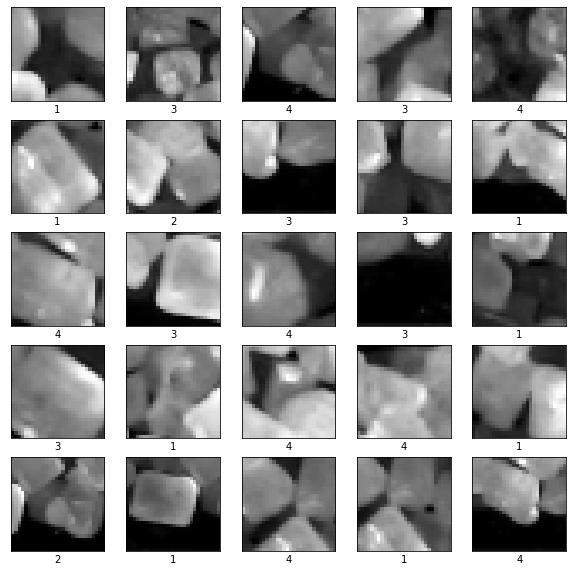

In [43]:
Num=25
y_all=np.array(prediction_all)
plt.figure(figsize=(10,10))
for i in range(Num):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img28_all[i+25], cmap = "gray")
    label_all=y_all[i]
    plt.xlabel(label_all)
plt.show()